In [1]:
#copy piecewise zeta code from previous video 

In [2]:
import numpy as np
import scipy as sp
import math 
import matplotlib.pyplot as plt
inf=int(1e4)
def zeta1(z):
    f=lambda n: n**(-z)
    vf=np.vectorize(f)
    arr= vf(np.arange(1,inf,1))
    s= arr.sum()
    return s

def zeta2(z):
    f= lambda n: (-1)**(n-1) * n**(-z)
    vf=np.vectorize(f)
    arr= vf(np.arange(1,inf,1))
    s= arr.sum()
    s= s * 1/(1-2**(1-z))
    return s

def zeta3(z):
    tau_1_s= lambda x: x**(-z) * np.e**(-x) 
    tau= sp.integrate.quad(tau_1_s, 0, inf, complex_func=True)[0]
    s= 2**z * np.pi**(z-1) * np.sin(np.pi*z*.5)* tau * zeta1(1-z)
    return s

def zeta(z):
    if z.real>1:
        return zeta1(z)
    elif z==1:
        return None
    elif z.real>0:
        return zeta2(z)
    else:
        return zeta3(z)

In [3]:
import pandas as pd
df=pd.DataFrame()
reals=np.arange(-50,50,.5)
imags=np.arange(-50,50,.5)
from itertools import product
df[['reals','imags']]=list(product(reals,imags))

In [5]:
df['complex']=df['reals']+1j*df['imags']

In [ ]:
df['zeta']=df['complex'].apply(zeta)

In [7]:
df['zeta_abs']=df['zeta'].apply(abs)
df['zeta_angle']=df['zeta'].apply(np.angle)

In [9]:
pivot=pd.pivot_table(df, values='zeta_angle', index='imags', columns='reals')

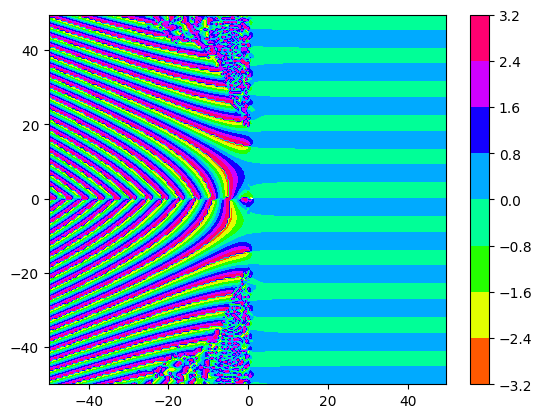

In [11]:
plt.contourf(pivot.index, pivot.columns, pivot, cmap='hsv')
plt.colorbar()